In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read the data into pandas

df = pd.read_csv(r'C:\Users\jihad\Desktop\Portfolio\PythonCorrelation\movies.csv')



In [2]:
# We're interested in examining correlation between variables
# Get a look at the data
df.head()


      
    
 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Data types 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Missing data?

# Loop through columns, see if there are null values, percentage of column missing.
for col in df.columns:
   data_missing = np.mean(df[col].isnull())
   print('{}-{}%'.format(col, data_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# We have missing values in columns rating (77), released(2), scores(3),votes (3),
# writer(3), star(1), country(3), budget (2171), gross (189), company (17), runtime (4)

print(" \n Total NaN in each column in df : \n\n",
      df.isnull().sum())

print(" \n Total NaN values in df : \n\n",
       df.isnull().sum().sum())


df.tail()


 
 Total NaN in each column in df : 

 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
 
 Total NaN values in df : 

 2473


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [6]:
df=df.fillna(method='ffill')


for col in df.columns:
   data_missing = np.mean(df[col].isnull())
   print('{}-{}%'.format(col, data_missing))


name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [7]:
# Clean up column value formating 
# Removing extra decimal from budget and gross columns.



df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,7000,13266,Cactus Blue Entertainment,90
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,90
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",5.7,29,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120
7667,Tee em el,R,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,15000,13266,PK 65 Films,102


In [8]:
# Extract country from released,
# Extract year from released 
# year <- extracted year 

df_datesplit = pd.DataFrame(df.released.str.split('(', 1).tolist(),
                         columns = ['releasedDate','releasedcountry'])



df_datesplit.head()



,releasedDate,releasedcountry
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)


In [9]:
df['released'] = df_datesplit['releasedDate']

df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [10]:


df_yearsplit = pd.DataFrame(df_datesplit.releasedDate.str.split(',', 1).tolist(),
                         columns = ['MonthDay','CorrectYear'])

df_yearsplit.head()



,MonthDay,CorrectYear
0,June 13,1980
1,July 2,1980
2,June 20,1980
3,July 2,1980
4,July 25,1980


In [11]:
# Set the correct year, year field value and released date year should match.

df['year'] = df_yearsplit['CorrectYear']
df.head()




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [12]:
# Converting string date to numerical date format i.e July 26, 1980 -> 1980-07-26

df['released']=pd.to_datetime(df.released).dt.strftime('%Y-%m-%d')


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [13]:
# Deleting temporary dataframes

lst = [df_yearsplit, df_datesplit ]
del df_yearsplit, df_datesplit,
del lst

In [14]:
# Dropping duplicates

# Get a list of unique values in column 'company'
# df['company'].drop_duplicates().sort_values(ascending=False)
     
    
# No dupliate rows.    
print(df.drop_duplicates().sort_values(by=['gross'], ascending=False).size)
print(df.sort_values(by=['gross'], ascending=False).size)


# To drop duplicates if needed.
# df.drop_duplicates()

115020
115020


In [15]:
# Sorting 

#  To see all the data
 
pd.set_option('display.max_rows', None)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)


In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [17]:
# Hypothesis: Budget is highly correlated with earnings
#            Company may be highly correlated with earnings



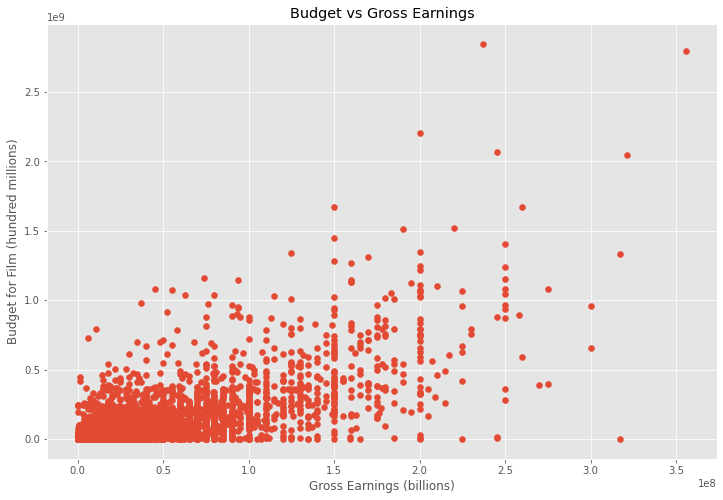

In [18]:
# Scatter plot to investigate


plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings (billions)")
plt.ylabel("Budget for Film (hundred millions)")

plt.show()

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<AxesSubplot:xlabel='budget', ylabel='gross'>

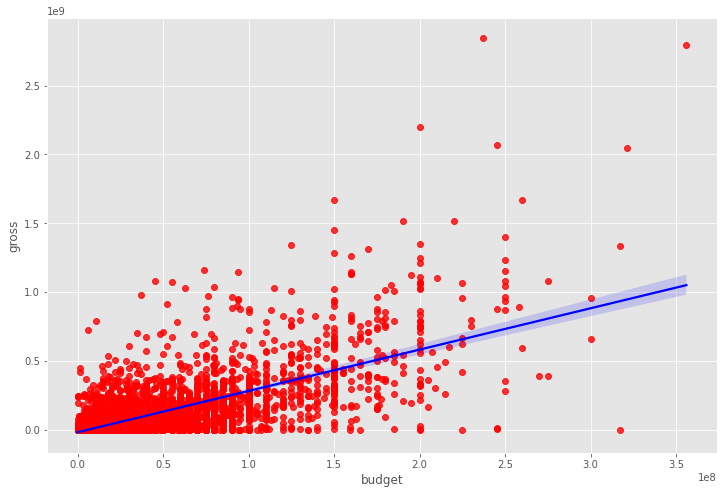

In [20]:
# Plot budget vs gross with regression line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})



In [21]:
# Investing correlation

In [22]:
df.corr(method ='pearson')  # Correlation matrix

,score,votes,budget,gross,runtime
score,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.399116,0.309140,0.263424,0.245443,1.000000


In [23]:
# Note budget and gross correlation 0.702
# votes-gross correlation 0.632

In [24]:
correlation_matrix= df.corr(method="pearson")

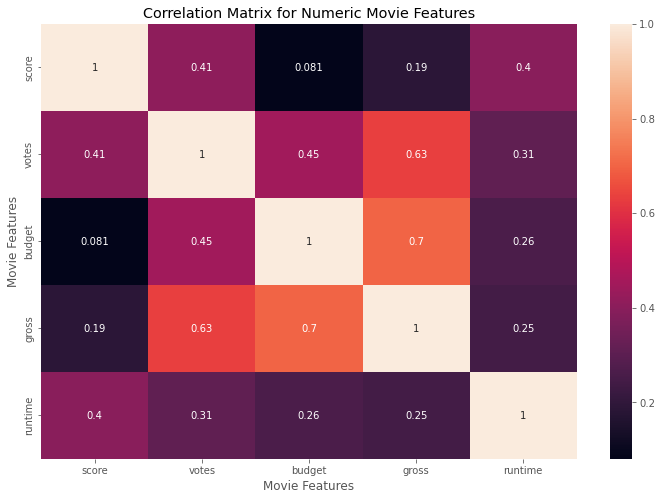

In [25]:
# Viz correlation coefficients
sns.heatmap(correlation_matrix, annot=True)


plt.title("Correlation Matrix for Numeric Movie Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [26]:
# Investigating 'company'

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [27]:
# To compare string fields we numerize them to categorical types


df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes



In [28]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,29,2103,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,39,2862,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,17,1220,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,35,2606,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,38,2777,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


In [29]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,29,2103,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,39,2862,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,17,1220,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,35,2606,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,38,2777,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


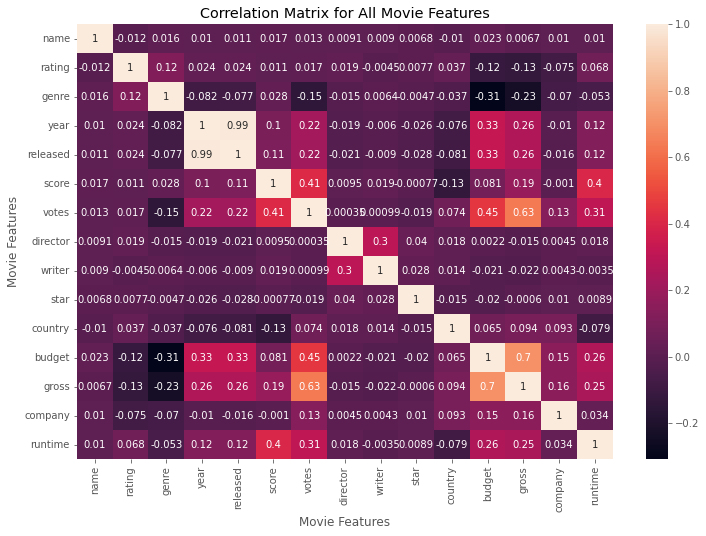

In [30]:
# Viz correlation coefficients
correlation_matrix= df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)


plt.title("Correlation Matrix for All Movie Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [31]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011776,0.016355,0.010221,0.011465,0.017237,0.013038,0.009079,0.009033,0.006820,-0.010127,0.022882,0.006747,0.009980,0.010448
rating,-0.011776,1.000000,0.116837,0.023655,0.023507,0.011389,0.016909,0.018842,-0.004470,0.007728,0.036900,-0.117510,-0.126848,-0.075280,0.068470
genre,0.016355,0.116837,1.000000,-0.081616,-0.077343,0.027832,-0.145296,-0.015258,0.006434,-0.004696,-0.036506,-0.308228,-0.232776,-0.070347,-0.052806
year,0.010221,0.023655,-0.081616,1.000000,0.994142,0.104967,0.219578,-0.018666,-0.006039,-0.025902,-0.075539,0.328736,0.255704,-0.010111,0.121418
released,0.011465,0.023507,-0.077343,0.994142,1.000000,0.107259,0.217664,-0.021312,-0.009031,-0.027946,-0.080624,0.327540,0.256389,-0.016401,0.123117
score,0.017237,0.011389,0.027832,0.104967,0.107259,1.000000,0.409064,0.009509,0.019214,-0.000772,-0.134361,0.080708,0.186264,-0.001013,0.399116
votes,0.013038,0.016909,-0.145296,0.219578,0.217664,0.409064,1.000000,0.000349,0.000993,-0.019364,0.073612,0.449422,0.632341,0.132588,0.309140
director,0.009079,0.018842,-0.015258,-0.018666,-0.021312,0.009509,0.000349,1.000000,0.299463,0.039834,0.017683,0.002167,-0.014536,0.004536,0.017537
writer,0.009033,-0.004470,0.006434,-0.006039,-0.009031,0.019214,0.000993,0.299463,1.000000,0.027740,0.014480,-0.020821,-0.022491,0.004274,-0.003506
star,0.006820,0.007728,-0.004696,-0.025902,-0.027946,-0.000772,-0.019364,0.039834,0.027740,1.000000,-0.014519,-0.019806,-0.000601,0.010243,0.008921


In [32]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.011776
          genre       0.016355
          year        0.010221
          released    0.011465
          score       0.017237
          votes       0.013038
          director    0.009079
          writer      0.009033
          star        0.006820
          country    -0.010127
          budget      0.022882
          gross       0.006747
          company     0.009980
          runtime     0.010448
rating    name       -0.011776
          rating      1.000000
          genre       0.116837
          year        0.023655
          released    0.023507
          score       0.011389
          votes       0.016909
          director    0.018842
          writer     -0.004470
          star        0.007728
          country     0.036900
          budget     -0.117510
          gross      -0.126848
          company    -0.075280
          runtime     0.068470
genre     name        0.016355
          rating      0.116837
        

In [33]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs


genre     budget     -0.308228
budget    genre      -0.308228
gross     genre      -0.232776
genre     gross      -0.232776
          votes      -0.145296
votes     genre      -0.145296
score     country    -0.134361
country   score      -0.134361
rating    gross      -0.126848
gross     rating     -0.126848
rating    budget     -0.117510
budget    rating     -0.117510
genre     year       -0.081616
year      genre      -0.081616
released  country    -0.080624
country   released   -0.080624
          runtime    -0.078803
runtime   country    -0.078803
released  genre      -0.077343
genre     released   -0.077343
country   year       -0.075539
year      country    -0.075539
company   rating     -0.075280
rating    company    -0.075280
genre     company    -0.070347
company   genre      -0.070347
runtime   genre      -0.052806
genre     runtime    -0.052806
country   genre      -0.036506
genre     country    -0.036506
released  star       -0.027946
star      released   -0.027946
        

In [34]:
high_corr = sorted_pairs[ (sorted_pairs) >0.5]
high_corr

gross     votes       0.632341
votes     gross       0.632341
budget    gross       0.701819
gross     budget      0.701819
year      released    0.994142
released  year        0.994142
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [35]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation.